In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from dash import dcc
from sklearn.metrics import roc_curve,f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jordi/Downloads/Datasets for Notebooks on Desktop/train.csv')

In [3]:
df.head()

id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1

In [4]:
df.set_index('id',inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 25.9 KB


In [6]:
df.describe()

gravity          ph         osmo        cond        urea   
count  414.000000  414.000000   414.000000  414.000000  414.000000  \
mean     1.017894    5.955459   651.545894   21.437923  278.657005   
std      0.006675    0.642260   234.676567    7.514750  136.442249   
min      1.005000    4.760000   187.000000    5.100000   10.000000   
25%      1.012000    5.530000   455.250000   15.500000  170.000000   
50%      1.018000    5.740000   679.500000   22.200000  277.000000   
75%      1.022000    6.280000   840.000000   27.600000  385.000000   
max      1.040000    7.940000  1236.000000   38.000000  620.000000   

             calc      target  
count  414.000000  414.000000  
mean     4.114638    0.444444  
std      3.217641    0.497505  
min      0.170000    0.000000  
25%      1.450000    0.000000  
50%      3.130000    0.000000  
75%      6.630000    1.000000  
max     14.340000    1.000000

In [7]:
df.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

# EDA for insights about data and understanding

In [8]:
fig=px.bar(df,x=df['target'].unique(),y=df['target'].value_counts().tolist(),color=["No", "Yes"])
fig.show()

Number of instances of having kidney stone is fairly balanced to instances of not having kidney stone (115:92)

### Univariate plots for exploring each features independently

In [9]:
fig = make_subplots(rows=6, cols=2)

img_list = [
    go.Histogram(x=df.gravity,nbinsx=30),
    go.Box(px.box(df,y='gravity')['data'][0]),
    go.Histogram(x=df.ph,nbinsx=30),
    go.Box(px.box(df,y='ph')['data'][0]),
    go.Histogram(x=df.osmo,nbinsx=30),
    go.Box(px.box(df,y='osmo')['data'][0]),
    go.Histogram(x=df.cond,nbinsx=30),
    go.Box(px.box(df,y='cond')['data'][0]),
    go.Histogram(x=df.urea,nbinsx=30),
    go.Box(px.box(df,y='urea')['data'][0]),
    go.Histogram(x=df.calc,nbinsx=30),
    go.Box(px.box(df,y='calc')['data'][0])
]

fig.add_trace(img_list[0], row=1, col=1)
fig.add_trace(img_list[1], row=1, col=2)
fig.add_trace(img_list[2], row=2, col=1)
fig.add_trace(img_list[3], row=2, col=2)
fig.add_trace(img_list[4], row=3, col=1)
fig.add_trace(img_list[5], row=3, col=2)
fig.add_trace(img_list[6], row=4, col=1)
fig.add_trace(img_list[7], row=4, col=2)
fig.add_trace(img_list[8], row=5, col=1)
fig.add_trace(img_list[9], row=5, col=2)
fig.add_trace(img_list[10], row=6, col=1)
fig.add_trace(img_list[11], row=6, col=2)

annotations=[
    dict(text='gravity', x=0, y=1, xref='paper', yref='paper', showarrow=True),
        dict(text='', x=0.5, y=1, xref='paper', yref='paper', showarrow=False),
    dict(text='ph', x=0, y=0.825, xref='paper', yref='paper', showarrow=True),
        dict(text='', x=0.5, y=1, xref='paper', yref='paper', showarrow=False),
    dict(text='osmo', x=0, y=0.65, xref='paper', yref='paper', showarrow=True),
        dict(text='', x=0.5, y=1, xref='paper', yref='paper', showarrow=False),
    dict(text='cond', x=0, y=0.477, xref='paper', yref='paper', showarrow=True),
        dict(text='', x=0.5, y=1, xref='paper', yref='paper', showarrow=False),
    dict(text='urea', x=0, y=0.30, xref='paper', yref='paper', showarrow=True),
        dict(text='', x=0.5, y=1, xref='paper', yref='paper', showarrow=False),
    dict(text='calc', x=0, y=0.125, xref='paper', yref='paper', showarrow=True),
        dict(text='', x=0.5, y=1, xref='paper', yref='paper', showarrow=False)
    ]
fig.update_layout(height=2000, width=1000, title_text='Distribution of each feature',annotations=annotations)

fig.show()

1) Features do not follow uniform distribution
2) gravity and ph columns have few outliers in them
3) Features are wide in terms of their scale

### Bivariate plots for exploring relation between features and target

<Axes: xlabel='target', ylabel='calc'>

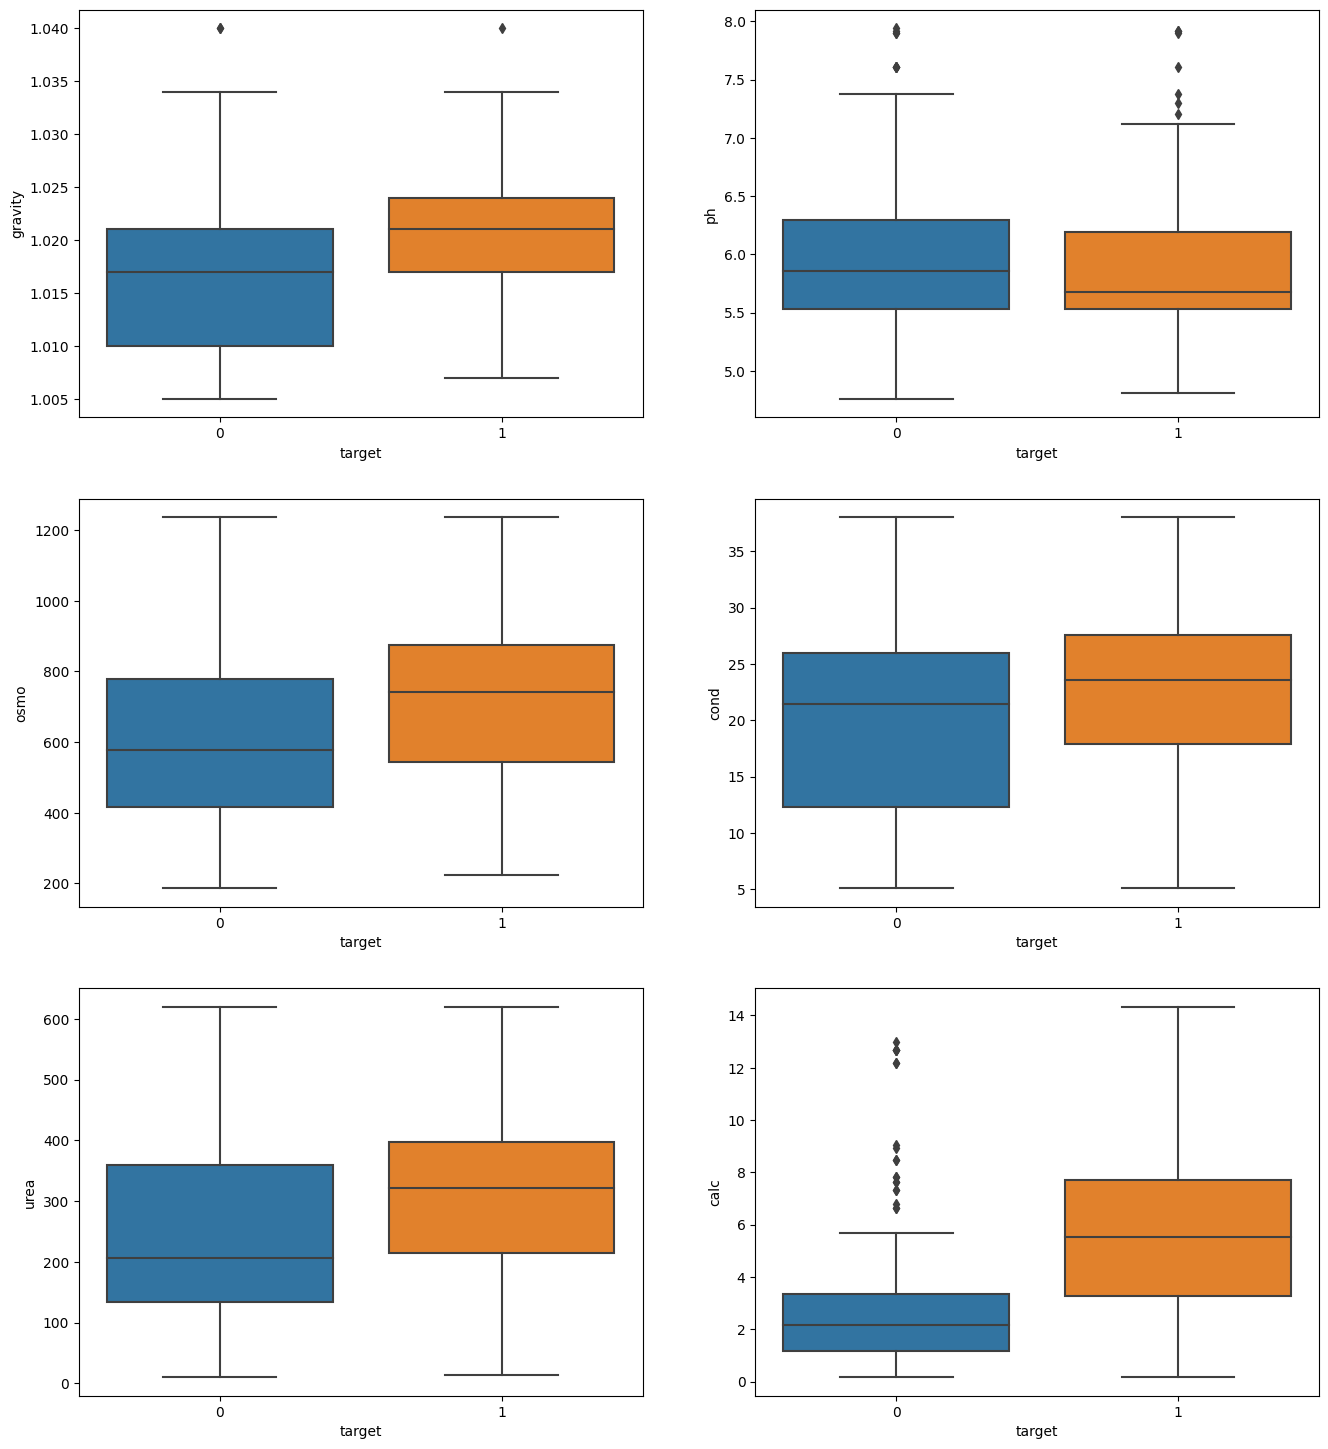

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 2)
fig.set_size_inches(16, 18)

sns.boxplot(x = df['target'], y = df['gravity'], ax=axes[0][0])
sns.boxplot(x = df['target'], y = df['ph'], ax=axes[0][1])
sns.boxplot(x = df['target'], y = df['osmo'], ax=axes[1][0])
sns.boxplot(x = df['target'], y = df['cond'], ax=axes[1][1])
sns.boxplot(x = df['target'], y = df['urea'], ax=axes[2][0])
sns.boxplot(x = df['target'], y = df['calc'], ax=axes[2][1])

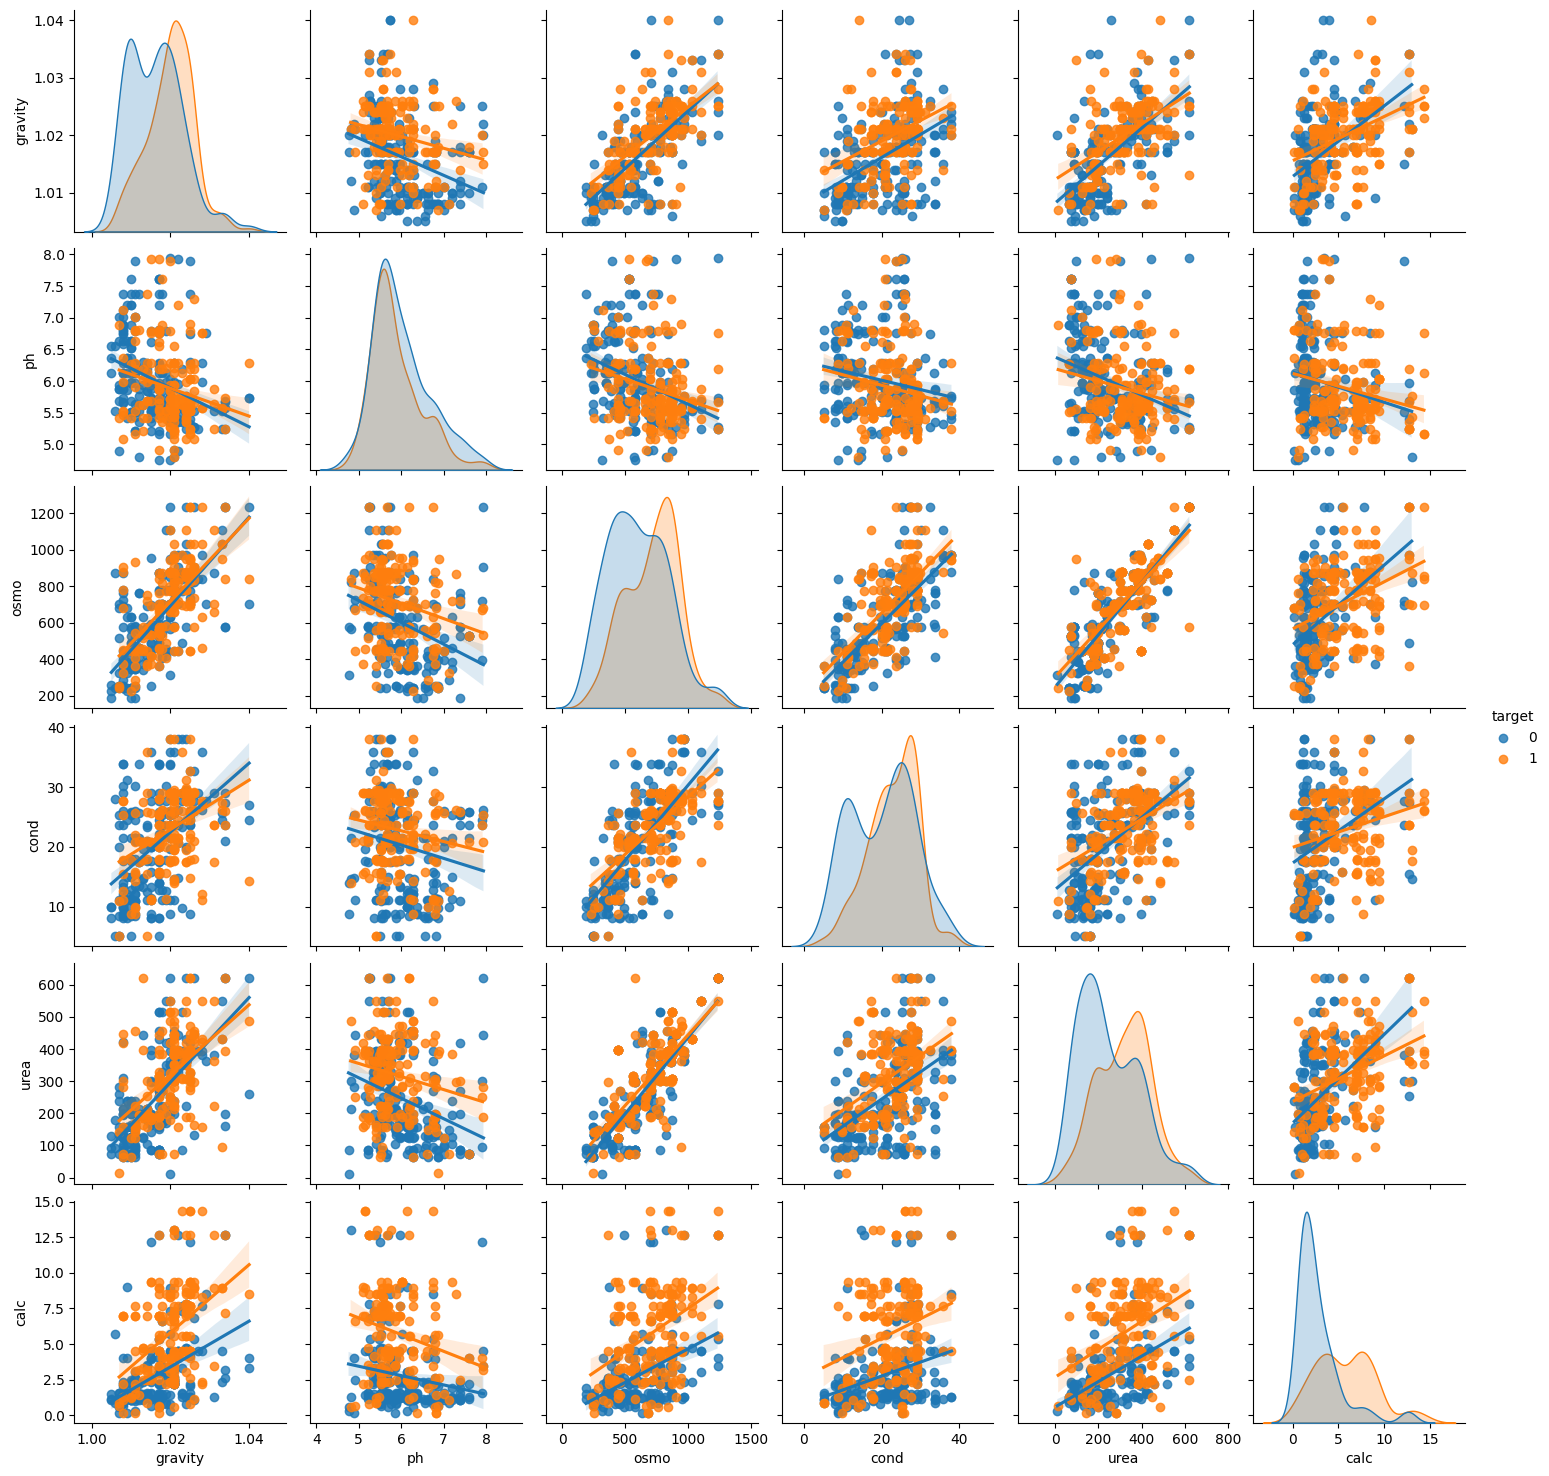

In [11]:
sns.pairplot(df,hue='target',kind='reg') 

1) The gravity,calc,urea,cond,osmo, and pH are different for people with kidney stone from patients with no kidney stone
2) Generally people with no kidney stone have low gravity,calc,urea,cond, and osmo but higher pH value than people with kidney stone
3) Many features are correlated
4) There is no clear seperation of positive cases to negative cases

### Correlation plot

In [12]:
corr_matrix=df.corr()
fig=px.imshow(corr_matrix,text_auto=True,height=600)
fig.show()

1) Features have low or moderate correlation
2) Urea and osmo have high correlation of 0.8 and osmo and cond also have high correlation of 0.7
3) There is multicollinearity present in features

Given that dataset is smaller and have multicollinearity present in it, following classification model can be better choice:
    1) Logistic Regression
    2) Naive Byes 
    3) Decision tree
    4) SVM (Support Vector Machine)

# Preprocessing and defining pipelines

### Removing outliers from dataset

In [13]:
def remove_outliers(df,col):
    q1 = np.quantile(df[col] ,0.25)
    q3 = np.quantile(df[col] , 0.75)
    iqr = q3-q1
    lower_fence = q1 - 1.5*iqr
    upper_fence = q3 + 1.5*iqr
    df.drop(df[df[col]> upper_fence].index , inplace = True)
    df.drop(df[df[col]< lower_fence].index ,inplace =True)

#Outliers are present in gravity and ph columns only
remove_outliers(df,'gravity')
remove_outliers(df,'ph')
df.shape

(399, 7)

### Splitting dataset into training and testing dataset

In [14]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:6],df.iloc[:,6],test_size=0.20,random_state=2)

### Function to check accuracy score, confusion matrix, precession, recall, AUC-ROC, ROC curve, and F1 score

In [15]:
def show_performance(model,x_test,y_test):
    
    #making prediction
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]
    
    print('Accuracy score: ',accuracy_score(y_test,y_pred))
    print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))
    print('Precession: ',precision_score(y_test, y_pred))
    print('Recall: ',recall_score(y_test, y_pred))
    print('AUC score: ',roc_auc_score(y_test, y_prob))
    print("F1 Score:", f1_score(y_test,y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

### Logistic Regression

Accuracy score:  0.7125
Confusion matrix: 
 [[41  8]
 [15 16]]
Precession:  0.6666666666666666
Recall:  0.5161290322580645
AUC score:  0.7452271231073074
F1 Score: 0.5818181818181819


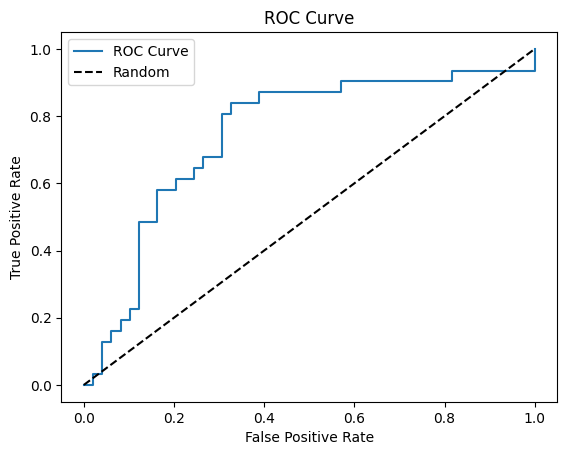

In [17]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l1',C=1/0.01,solver='liblinear'))
])
model = pipeline.fit(x_train, y_train)
show_performance(model,x_test,y_test)

### Random Forest

Accuracy score:  0.7125
Confusion matrix: 
 [[39 10]
 [13 18]]
Precession:  0.6428571428571429
Recall:  0.5806451612903226
AUC score:  0.7794601711652402
F1 Score: 0.6101694915254238


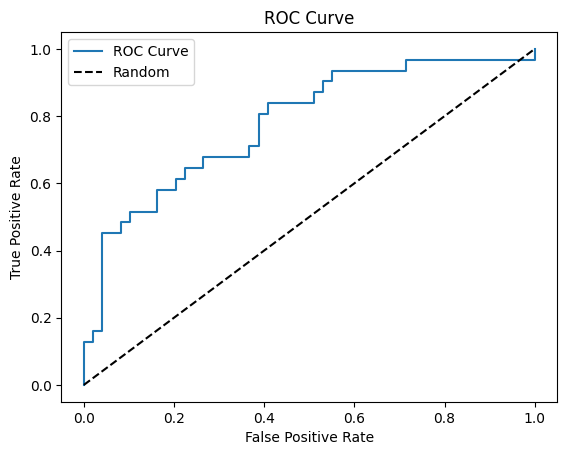

In [18]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

#Tuning hyperparameters of Random forest
param_grid = {
    'rf__n_estimators': [100, 200, 300, 400, 500, 600],
    'rf__max_depth': [None, 5, 10, 15, 20, 25],
    'rf__min_samples_split': [2, 5, 10, 15, 18, 22]
}

#Performing cross-validation for selecting best hyperparameters in algorithm
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
model = grid_search.best_estimator_

# Checking performance of Random forest with best selected parameters
show_performance(model,x_test,y_test)

### Decision Tree Classifier

Accuracy score:  0.7125
Confusion matrix: 
 [[39 10]
 [13 18]]
Precession:  0.6428571428571429
Recall:  0.5806451612903226
AUC score:  0.7271231073074391
F1 Score: 0.6101694915254238


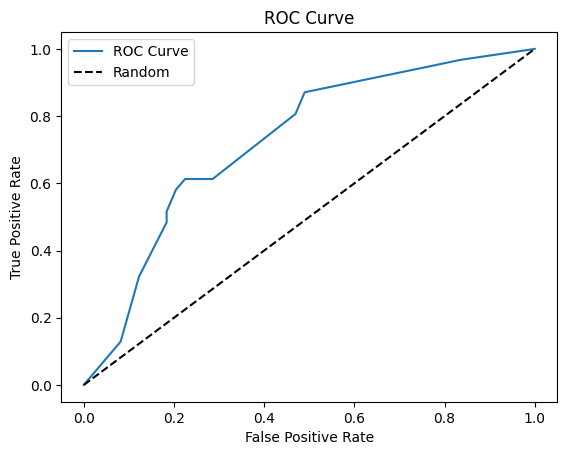

In [19]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the features
    ('dt', DecisionTreeClassifier())  # Decision Tree classifier
])

#Tuning hyperparameters of Random forest
param_grid = {
    'dt__max_depth': [None, 5, 10, 15, 20],
    'dt__min_samples_split': [2, 5, 10, 13, 15]
}

#Performing cross-validation for selecting best hyperparameters in algorithm
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
model = grid_search.best_estimator_

# Checking performance of decision tree with best selected parameters
show_performance(model,x_test,y_test)

### GradientBoostingClassifier

Accuracy score:  0.675
Confusion matrix: 
 [[40  9]
 [17 14]]
Precession:  0.6086956521739131
Recall:  0.45161290322580644
AUC score:  0.7478604344963793
F1 Score: 0.5185185185185185


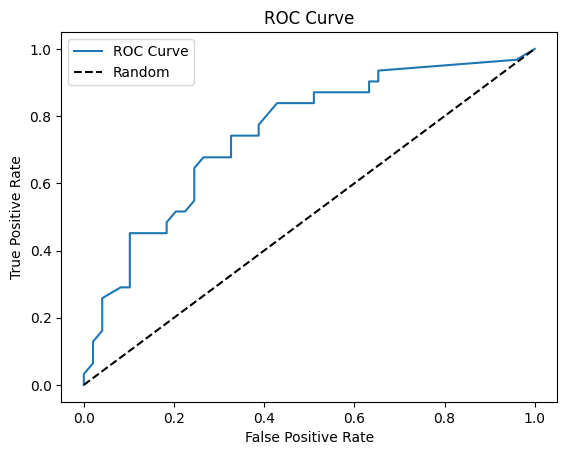

In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('clf', GradientBoostingClassifier()) 
])

#Tuning hyperparameters of GradientBoostingClassifier
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__learning_rate': [0.1, 0.05, 0.01],
    'clf__max_depth': [3, 4, 5]
}

#Performing cross-validation for selecting best hyperparameters in algorithm
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
model = grid_search.best_estimator_

# Checking performance of gradientboostingclassifier with best selected parameters
show_performance(model,x_test,y_test)